In [55]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import statistics as stats





<h2>data acquistion</h2>

In [56]:
df=pd.read_csv("loan_prediction.csv")

In [57]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<h2>data preprocessing</h2>

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [59]:
df1=df.drop("Loan_ID",axis=1)

In [60]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [61]:
df1.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [62]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# removing null values from dataset

In [63]:
df1["Gender"]=df1["Gender"].fillna(stats.mode(df1["Gender"]))
df1["Married"]=df1["Married"].fillna(stats.mode(df1["Married"]))
df1["Dependents"]=df1["Dependents"].fillna(stats.mode(df1["Dependents"]))
df1["Self_Employed"]=df1["Self_Employed"].fillna(stats.mode(df1["Self_Employed"]))
df1["LoanAmount"]=df1["LoanAmount"].fillna(np.mean(df1["LoanAmount"]))
df1["Loan_Amount_Term"]=df1["Loan_Amount_Term"].fillna(np.mean(df1["Loan_Amount_Term"]))
df1["Credit_History"]=df1["Credit_History"].fillna(np.mean(df1["Credit_History"]))


In [64]:
df1.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [65]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.842199,0.349681,0.0,1.00,1.0,1.00,1.0


In [66]:
df1.shape

(614, 12)

# DATA VISUALIZATION

In [67]:
corr = df1.corr(method = 'pearson')
corr

C:\Users\Hp\AppData\Local\Temp\ipykernel_11332\818360628.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr(method = 'pearson')


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000


<Axes: >

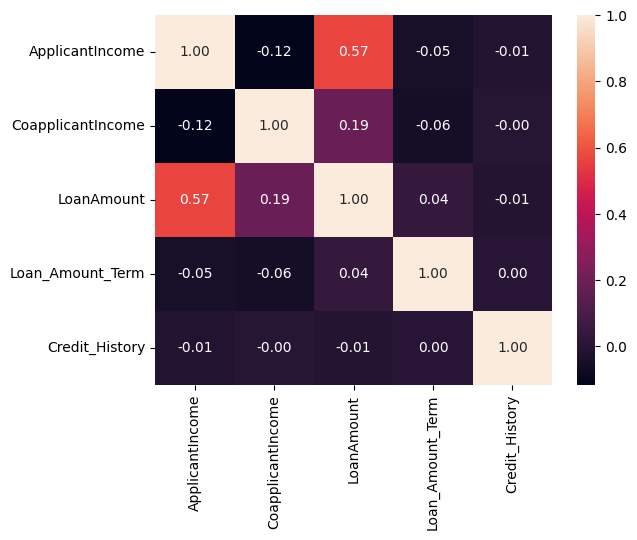

In [68]:
sns.heatmap(corr,annot =True,fmt=".2f")

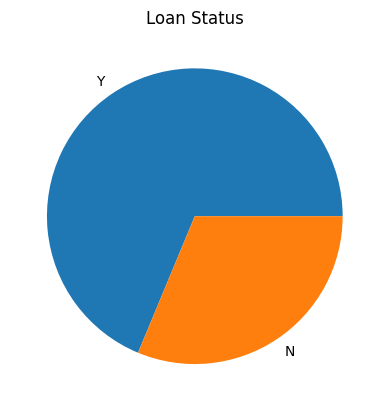

In [69]:
loan_Status=df1["Loan_Status"].value_counts()
plt.pie(loan_Status,labels=loan_Status.index)
plt.title("Loan Status")
plt.show()

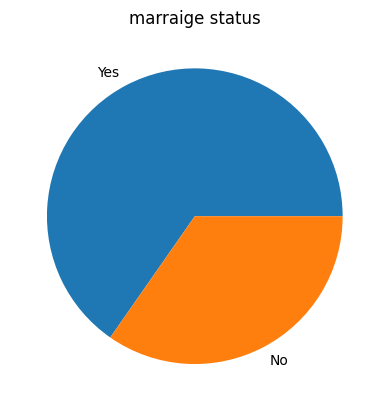

In [70]:
Marraige_Status=df1["Married"].value_counts()
plt.pie(Marraige_Status,labels=Marraige_Status.index)
plt.title("marraige status")
plt.show()

In [71]:
df1["Married"].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

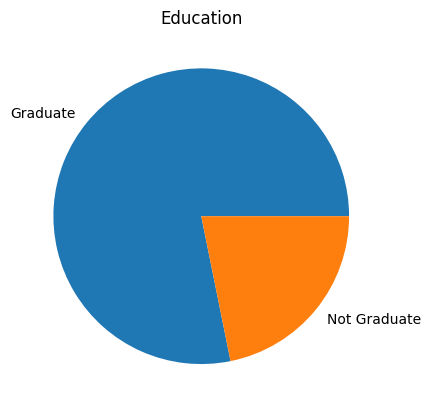

In [72]:
Education=df1["Education"].value_counts()
plt.pie(Education,labels=Education.index)
plt.title("Education")
plt.show()

In [73]:
df1["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

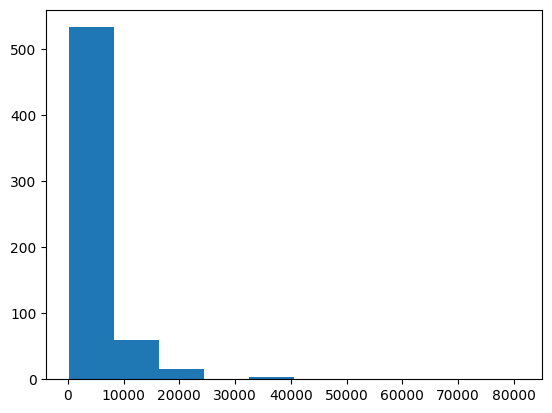

In [74]:
plt.hist(df1["ApplicantIncome"])
plt.show()

In [75]:
fig_income = px.box(df1, x='Loan_Status', 
                    y='ApplicantIncome',
                    color="Loan_Status", 
                    title='Loan_Status vs ApplicantIncome')
fig_income.show()

NameError: name 'px' is not defined

In [76]:
Q1 = df1['ApplicantIncome'].quantile(0.25)
Q3 = df1['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df1 = df1[(df1['ApplicantIncome'] >= lower_bound) & (df1['ApplicantIncome'] <= upper_bound)]

In [77]:
fig_income = px.box(df1, x='Loan_Status', 
                    y='ApplicantIncome',
                    color="Loan_Status", 
                    title='Loan_Status vs ApplicantIncome')
fig_income.show()

NameError: name 'px' is not defined

In [ ]:
fig_coapplicant_income = px.box(df1, 
                                x='Loan_Status', 
                                y='CoapplicantIncome',
                                color="Loan_Status", 
                                title='Loan_Status vs CoapplicantIncome')
fig_coapplicant_income.show()

In [78]:
Q1 = df1['CoapplicantIncome'].quantile(0.25)
Q3 = df1['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df1 = df1[(df1['ApplicantIncome'] >= lower_bound) & (df1['ApplicantIncome'] <= upper_bound)]

In [ ]:
fig_coapplicant_income = px.box(df1, 
                                x='Loan_Status', 
                                y='CoapplicantIncome',
                                color="Loan_Status", 
                                title='Loan_Status vs CoapplicantIncome')
fig_coapplicant_income.show()

In [79]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [80]:
# Convert categorical columns to numerical using one-hot encoding
cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
df1 = pd.get_dummies(df1, columns=cols)

In [81]:
df1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,Y,0,1,0,1,...,0,1,0,1,0,0,1,0,0,1
6,2333,1516.0,95.0,360.0,1.0,Y,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,3987,1411.0,157.0,360.0,1.0,Y,0,1,0,1,...,0,1,0,0,1,1,0,1,0,0
608,3232,1950.0,108.0,360.0,1.0,Y,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
609,2900,0.0,71.0,360.0,1.0,Y,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,Y,0,1,0,1,...,0,0,1,1,0,1,0,1,0,0


In [82]:
df2=df1.drop(["Gender_Female","Married_No","Education_Not Graduate","Self_Employed_No"],axis=1)

In [83]:
df2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,N,1,1,0,1,0,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,Y,1,1,1,0,0,0,1,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,Y,1,1,1,0,0,0,0,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,Y,1,1,0,0,1,0,1,1,0,0,1
6,2333,1516.0,95.0,360.0,1.0,Y,1,1,1,0,0,0,0,0,0,0,1


In [84]:
# Split the dataset into features (X) and target (y)
X = df2.drop('Loan_Status', axis=1)
y = df2['Loan_Status']

In [85]:
columns=X.columns
columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [86]:
#Renaming the columns

In [87]:
X.rename(columns={'Gender_Male':"Gender",'Married_Yes':"Married",'Education_Graduate':"Education",'Self_Employed_Yes':"Self_Employed"},inplace=True)

In [88]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,466.0,3418.515021,1116.614197,150.0,2587.25,3333.0,4166.750000,5829.0
CoapplicantIncome,466.0,1800.480515,3128.564709,0.0,0.00,1551.0,2403.750000,41667.0
LoanAmount,466.0,122.390949,47.751149,9.0,96.00,120.0,146.412162,495.0
Loan_Amount_Term,466.0,343.055794,65.343699,12.0,360.00,360.0,360.000000,480.0
Credit_History,466.0,0.836917,0.354851,0.0,1.00,1.0,1.000000,1.0
Gender,466.0,0.800429,0.400107,0.0,1.00,1.0,1.000000,1.0
Married,466.0,0.648069,0.478086,0.0,0.00,1.0,1.000000,1.0
Dependents_0,466.0,0.609442,0.488400,0.0,0.00,1.0,1.000000,1.0
Dependents_1,466.0,0.150215,0.357666,0.0,0.00,0.0,0.000000,1.0
Dependents_2,466.0,0.163090,0.369845,0.0,0.00,0.0,0.000000,1.0


In [89]:
X["Property_Area_Rural"].value_counts()

0    335
1    131
Name: Property_Area_Rural, dtype: int64

# <h2>we need to scale the data <h2>

In [90]:
#as we see the mean of all column are on different scale we need to scale it on one value

In [91]:
scaler=StandardScaler()
X_Scaled=scaler.fit_transform(X)

In [92]:
X_Scaled=pd.DataFrame(X_Scaled,columns=columns)

In [93]:
X_Scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,466.0,-1.867843e-16,1.001075,-2.930312,-0.745251,-0.076667,0.670813,2.161065
CoapplicantIncome,466.0,-4.574309e-17,1.001075,-0.576116,-0.576116,-0.079829,0.193034,12.756445
LoanAmount,466.0,-1.753485e-16,1.001075,-2.377174,-0.553271,-0.050125,0.503591,7.811529
Loan_Amount_Term,466.0,2.249035e-16,1.001075,-5.071821,0.259588,0.259588,0.259588,2.098005
Credit_History,466.0,-2.287155e-16,1.001075,-2.361036,0.460074,0.460074,0.460074,0.460074
Gender_Male,466.0,1.143577e-16,1.001075,-2.002686,0.499329,0.499329,0.499329,0.499329
Married_Yes,466.0,1.905962e-17,1.001075,-1.357005,-1.357005,0.736917,0.736917,0.736917
Dependents_0,466.0,-1.524770e-17,1.001075,-1.249176,-1.249176,0.800528,0.800528,0.800528
Dependents_1,466.0,-5.336694e-17,1.001075,-0.420437,-0.420437,-0.420437,-0.420437,2.378475
Dependents_2,466.0,9.529811e-17,1.001075,-0.441443,-0.441443,-0.441443,-0.441443,2.265299


In [94]:
y

1      N
2      Y
3      Y
5      Y
6      Y
      ..
607    Y
608    Y
609    Y
610    Y
613    N
Name: Loan_Status, Length: 466, dtype: object

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,y,test_size=0.2,random_state=42)

In [96]:
X_train.shape

(372, 16)

In [97]:
X_test.shape

(94, 16)

<h1>Training a Model<h1>
<h2>we use 3 model to check the best accuracy model<h2>    

In [98]:
forest=RandomForestClassifier()

In [99]:
forest.fit(X_train,y_train)

RandomForestClassifier()

In [100]:
prediction = forest.predict(X_test)

In [101]:
prediction[0:5]

array(['N', 'Y', 'N', 'Y', 'N'], dtype=object)

In [102]:
from sklearn.metrics import accuracy_score

In [103]:
accuracy_score(y_test,prediction)

0.7553191489361702

In [104]:
from sklearn.svm import SVC

In [105]:
classifier =SVC(kernel='linear')

In [106]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [107]:
predictions = classifier.predict(X_test)

In [108]:
predictions = classifier.predict(X_test)

In [109]:
accuracy_score(y_test,predictions)

0.7978723404255319

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [112]:
logpredictions = log.predict(X_test)

In [113]:
logpredictions[:5]

array(['N', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [114]:
accuracy_score(y_test,logpredictions)

0.7978723404255319

In [115]:
from sklearn.naive_bayes import GaussianNB

In [116]:
clf=GaussianNB()

In [123]:
clf.fit(X_train,y_train)

GaussianNB()

In [124]:
guassainpredictions = clf.predict(X_test)

In [125]:
accuracy_score(y_test,guassainpredictions)

0.723404255319149

In [ ]:
import pickle

In [ ]:
pickle.dump(classifier,open("classifier.pkl", "wb"))